n = 5


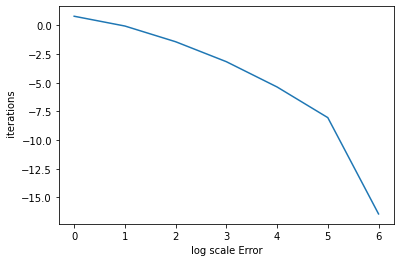

No. of iterations to converge = 6
converged point x = [[    5.00000021]
 [ -120.0000001 ]
 [  629.99999985]
 [-1120.00000016]
 [  629.99999985]]
n = 8


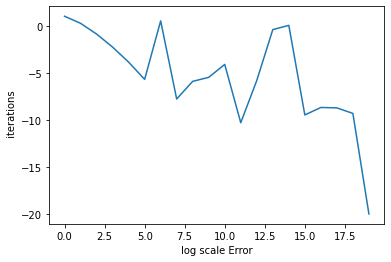

No. of iterations to converge = 19
converged point x = [[-8.00000407e+00]
 [ 5.04000069e+02]
 [-7.56000003e+03]
 [ 4.61999980e+04]
 [-1.38599992e+05]
 [ 2.16215989e+05]
 [-1.68167993e+05]
 [ 5.14799982e+04]]
n = 12


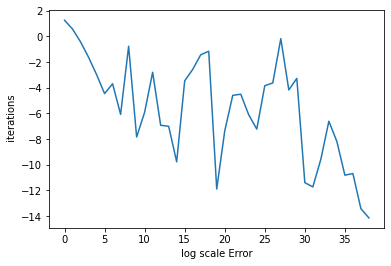

No. of iterations to converge = 38
converged point x = [[-9.60921534e+00]
 [ 8.15407288e+02]
 [-1.64966586e+04]
 [ 1.35510701e+05]
 [-5.36481917e+05]
 [ 1.02540008e+06]
 [-6.42578530e+05]
 [-6.57591399e+05]
 [ 8.04244405e+05]
 [ 6.63073081e+05]
 [-1.24128067e+06]
 [ 4.65506943e+05]]
n = 20


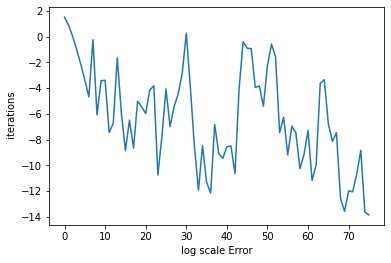

No. of iterations to converge = 75
converged point x = [[-1.09772145e+01]
 [ 1.05100540e+03]
 [-2.39569833e+04]
 [ 2.20428394e+05]
 [-9.65350725e+05]
 [ 1.99010296e+06]
 [-1.25269794e+06]
 [-1.34346789e+06]
 [ 8.83230941e+05]
 [ 1.68795446e+06]
 [ 3.88209251e+05]
 [-1.30552011e+06]
 [-1.71054295e+06]
 [-5.28240865e+05]
 [ 1.20868164e+06]
 [ 2.00288792e+06]
 [ 9.44586177e+05]
 [-1.43405011e+06]
 [-2.65094980e+06]
 [ 1.88785488e+06]]


In [26]:
import numpy as np
import matplotlib.pyplot as plt

## implememtation of conjugate gradient descent algorithm
def conjgrad(A, b, x):
    
    error = b - np.dot(A, x)
    u = error
    gr_old = np.dot(error.T, error)
    iters = 0
    y_val = [np.log(np.linalg.norm(error))]
    while np.linalg.norm(error) >1e-6:
        Au = np.dot(A, u)
        alpha = np.dot(error.T, error) / np.dot(u.T, Au)
        x = x + alpha* u
        error = error - alpha* Au
        gr_new = np.dot(error.T, error)
        u = error + (gr_new/gr_old)*u
        y_val.append(np.log(np.linalg.norm(error)))
        gr_old = gr_new
        iters +=1 
    x_val = np.arange(0,iters+1)
    y_val = np.array(y_val)
    plt.figure(0)
    plt.xlabel("log scale Error")
    plt.ylabel(" iterations")
    plt.plot(x_val,y_val)
    plt.show()
    plt.close()
    
    return x,iters

## Main calling procedure
if __name__=='__main__':
    
    N = [5,8,12,20]
    for n in N:
        A = np.zeros((n,n))
        b = np.ones(n)
        b = b.reshape(-1,1)
        x0 = np.zeros(n)
        x0 = x0.reshape(-1,1)
        for i in range(n):
            for j in range(n):
                   A[i,j] = 1/(i+j+1)
        print('n = %d'%n)
        x,iters = conjgrad(A,b,x0)
        print('No. of iterations to converge = %d'%iters)
        print('converged point x = ',end='')
        print(x)

In [ ]:
import numpy as np
import scipy.sparse.linalg

def LinearCG(A, b, x0, tol=1e-6):
    xk = x0
    rk = np.dot(A, xk) - b
    pk = -rk
    rk_norm = np.linalg.norm(rk)
    
    num_iter = 0
    curve_x = [xk]
    while rk_norm > tol:
        apk = np.dot(A, pk)
        rkrk = np.dot(rk, rk)
        
        alpha = rkrk / np.dot(pk, apk)
        xk = xk + alpha * pk
        rk = rk + alpha * apk
        beta = np.dot(rk, rk) / rkrk
        pk = -rk + beta * pk
        
        num_iter += 1
        curve_x.append(xk)
        rk_norm = np.linalg.norm(rk)
        print('Iteration: {} \t x = {} \t residual = {:.4f}'.
              format(num_iter, xk, rk_norm))
    
    print('\nSolution: \t x = {}'.format(xk))
        
    return np.array(curve_x)

np.random.seed(0)
'''
A = np.array( [[2.5409, -0.0113],[-0.0113,  0.5287]])
x_star = np.array([0.5488,0.7152])
b = np.array([1.3864 , 0.3719])

print('A\n', A, '\n')
print('b\n', b, '\n')
print('The solution x* should be\n', x_star)
x0 = np.array([-3, -4])
'''
A = np.zeros((20,20))
b = np.ones(20)
x0 = np.zeros(20)
for i in range(20):
    for j in range(20):
           A[i,j] = 1/(i+j+1)
            
print(np.linalg.det(A))
xs = scipy.sparse.linalg.cg(A, b, x0, tol=1e-6)
print(xs)

In [ ]:
 5.00000021,  -120.0000001 ,   629.99999985, -1120.00000016,
         629.99999985
        
-8.00000407e+00,  5.04000069e+02, -7.56000003e+03,  4.61999980e+04,
       -1.38599992e+05,  2.16215989e+05, -1.68167993e+05,  5.14799982e+04
    
9.60921814e+00,  8.15407288e+02, -1.64966586e+04,  1.35510701e+05,
       -5.36481917e+05,  1.02540008e+06, -6.42578530e+05, -6.57591399e+05,
        8.04244405e+05,  6.63073081e+05, -1.24128067e+06,  4.65506943e+05

        
9.96509359e+00, -7.51569623e+02,  1.32945598e+04, -9.17752261e+04,
        2.79561931e+05, -3.15733717e+05, -9.81146226e+04,  2.56122651e+05,
        2.28922681e+05, -5.28444327e+04, -2.71360258e+05, -2.54178843e+05,
       -3.86988583e+04,  2.12264822e+05,  3.27105945e+05,  2.16084481e+05,
       -7.95797801e+04, -3.75196359e+05, -3.55212506e+05,  4.00256875e+05
        
        
(6, array([    5.00000021,  -120.0000001 ,   629.99999985, -1120.00000016,
         629.99999985]))
(19, array([-8.00000407e+00,  5.04000069e+02, -7.56000003e+03,  4.61999980e+04,
       -1.38599992e+05,  2.16215989e+05, -1.68167993e+05,  5.14799982e+04]))
(38, array([-9.60921534e+00,  8.15407288e+02, -1.64966586e+04,  1.35510701e+05,
       -5.36481917e+05,  1.02540008e+06, -6.42578530e+05, -6.57591399e+05,
        8.04244405e+05,  6.63073081e+05, -1.24128067e+06,  4.65506943e+05]))
(75, array([-1.09772145e+01,  1.05100540e+03, -2.39569833e+04,  2.20428394e+05,
       -9.65350725e+05,  1.99010296e+06, -1.25269794e+06, -1.34346789e+06,
        8.83230941e+05,  1.68795446e+06,  3.88209251e+05, -1.30552011e+06,
       -1.71054295e+06, -5.28240865e+05,  1.20868164e+06,  2.00288792e+06,
        9.44586177e+05, -1.43405011e+06, -2.65094980e+06,  1.88785488e+06]))